In [8]:
import pandas as pd
import opentisim

# basic inputs
startyear = 2020
lifecycle = 10
years = list(range(startyear, startyear + lifecycle))

# define demand scenario
demand = []
for year in years:
    if year < 2025:
        demand.append(2_000_000)
    else:
        demand.append(2_000_000)
scenario_data = {'year': years, 'volume': demand}

carrier = 'DBT'

if carrier == 'liquid hydrogen':
    opentisim.liquidbulk.commodity_lhydrogen_data['smallhydrogen_perc'] = 0
    opentisim.liquidbulk.commodity_lhydrogen_data['largehydrogen_perc'] = 100
    opentisim.liquidbulk.commodity_lhydrogen_data['historic_data'] = []
    opentisim.liquidbulk.commodity_lhydrogen_data['scenario_data'] = []
    lhydrogen = opentisim.liquidbulk.Commodity(**opentisim.liquidbulk.commodity_lhydrogen_data)
    lhydrogen.scenario_data = pd.DataFrame(data=scenario_data)
    demand = [lhydrogen] 
    commodity_type_defaults = opentisim.liquidbulk.commodity_lhydrogen_data
    storage_type_defaults = opentisim.liquidbulk.storage_lh2_data
    h2retrieval_type_defaults = opentisim.liquidbulk.h2retrieval_lh2_data
if carrier == 'ammonia':
    opentisim.liquidbulk.commodity_ammonia_data["smallammonia_perc"] = 0
    opentisim.liquidbulk.commodity_ammonia_data["largeammonia_perc"] = 100
    opentisim.liquidbulk.commodity_ammonia_data['historic_data'] = []
    opentisim.liquidbulk.commodity_ammonia_data['scenario_data'] = []
    ammonia = opentisim.liquidbulk.Commodity(**opentisim.liquidbulk.commodity_ammonia_data)
    ammonia.scenario_data = pd.DataFrame(data=scenario_data)  #choose what carrier
    demand = [ammonia] 
    commodity_type_defaults = opentisim.liquidbulk.commodity_ammonia_data
    storage_type_defaults = opentisim.liquidbulk.storage_nh3_data
    h2retrieval_type_defaults = opentisim.liquidbulk.h2retrieval_nh3_data
if carrier == 'MCH': 
    opentisim.liquidbulk.commodity_MCH_data["handysize_perc"] = 0
    opentisim.liquidbulk.commodity_MCH_data["panamax_perc"] = 0
    opentisim.liquidbulk.commodity_MCH_data["vlcc_perc"] = 100
    opentisim.liquidbulk.commodity_MCH_data['historic_data'] = []
    opentisim.liquidbulk.commodity_MCH_data['scenario_data'] = []
    MCH = opentisim.liquidbulk.Commodity(**opentisim.liquidbulk.commodity_MCH_data)
    MCH.scenario_data = pd.DataFrame(data=scenario_data)  #choose what carrier
    demand = [MCH]
    commodity_type_defaults = opentisim.liquidbulk.commodity_MCH_data
    storage_type_defaults = opentisim.liquidbulk.storage_MCH_data
    h2retrieval_type_defaults = opentisim.liquidbulk.h2retrieval_MCH_data
if carrier == 'DBT': 
    opentisim.liquidbulk.commodity_DBT_data["handysize_perc"] = 0
    opentisim.liquidbulk.commodity_DBT_data["panamax_perc"] = 0
    opentisim.liquidbulk.commodity_DBT_data["vlcc_perc"] = 100
    opentisim.liquidbulk.commodity_DBT_data['historic_data'] = []
    opentisim.liquidbulk.commodity_DBT_data['scenario_data'] = []
    DBT = opentisim.liquidbulk.Commodity(**opentisim.liquidbulk.commodity_DBT_data)
    DBT.scenario_data = pd.DataFrame(data=scenario_data)  #choose what carrier
    demand = [DBT] 
    commodity_type_defaults = opentisim.liquidbulk.commodity_DBT_data
    storage_type_defaults = opentisim.liquidbulk.storage_DBT_data
    h2retrieval_type_defaults = opentisim.liquidbulk.h2retrieval_DBT_data

# instantiate vessels
Smallhydrogen = opentisim.liquidbulk.Vessel(**opentisim.liquidbulk.smallhydrogen_data)
Largehydrogen = opentisim.liquidbulk.Vessel(**opentisim.liquidbulk.largehydrogen_data)
Smallammonia = opentisim.liquidbulk.Vessel(**opentisim.liquidbulk.smallammonia_data)
Largeammonia = opentisim.liquidbulk.Vessel(**opentisim.liquidbulk.largeammonia_data)
Handysize = opentisim.liquidbulk.Vessel(**opentisim.liquidbulk.handysize_data)
Panamax = opentisim.liquidbulk.Vessel(**opentisim.liquidbulk.panamax_data)
VLCC = opentisim.liquidbulk.Vessel(**opentisim.liquidbulk.vlcc_data)

vessels = [Smallhydrogen, Largehydrogen, Smallammonia, Largeammonia, Handysize, Panamax, VLCC]

if carrier == 'MCH' or carrier == 'DBT':
    dwelltime = 30/365
if carrier == 'liquid hydrogen':
    dwelltime = 30/365 #15
else:
    dwelltime = 30/365

# define terminal
Terminal = opentisim.liquidbulk.System(
    startyear=startyear,
    lifecycle=lifecycle,
    elements= demand+ vessels,
    operational_hours=16 * 365,
    terminal_supply_chain={'berth_jetty','pipeline_jetty_-_terminal', 'storage', 'h2_retrieval'},
    debug=False,
    commodity_type_defaults=commodity_type_defaults,
    storage_type_defaults=storage_type_defaults,
    kendall='E2/E2/n',
    allowable_waiting_service_time_ratio_berth=0.3,
    h2retrieval_type_defaults=h2retrieval_type_defaults,
    allowable_dwelltime= dwelltime)

Terminal.modelframe = list(range(startyear, startyear + lifecycle))
Terminal.revenues = []
Terminal.demurrage = []
# run simulation
Terminal.simulate()



In [9]:
print(len(Terminal.elements))

throughput_online, throughput_terminal_in,throughput_online_jetty_in, throughput_online_stor_in, throughput_online_plant_in, throughput_planned, throughput_planned_jetty,throughput_planned_pipej,  throughput_planned_storage, throughput_planned_plant, Demand,Demand_plant_in, Demand_storage_in,Demand_jetty_in = Terminal.throughput_elements(2024)
print(Demand_storage_in)
print(throughput_online_stor_in)

75
2200000.0
2200000.0


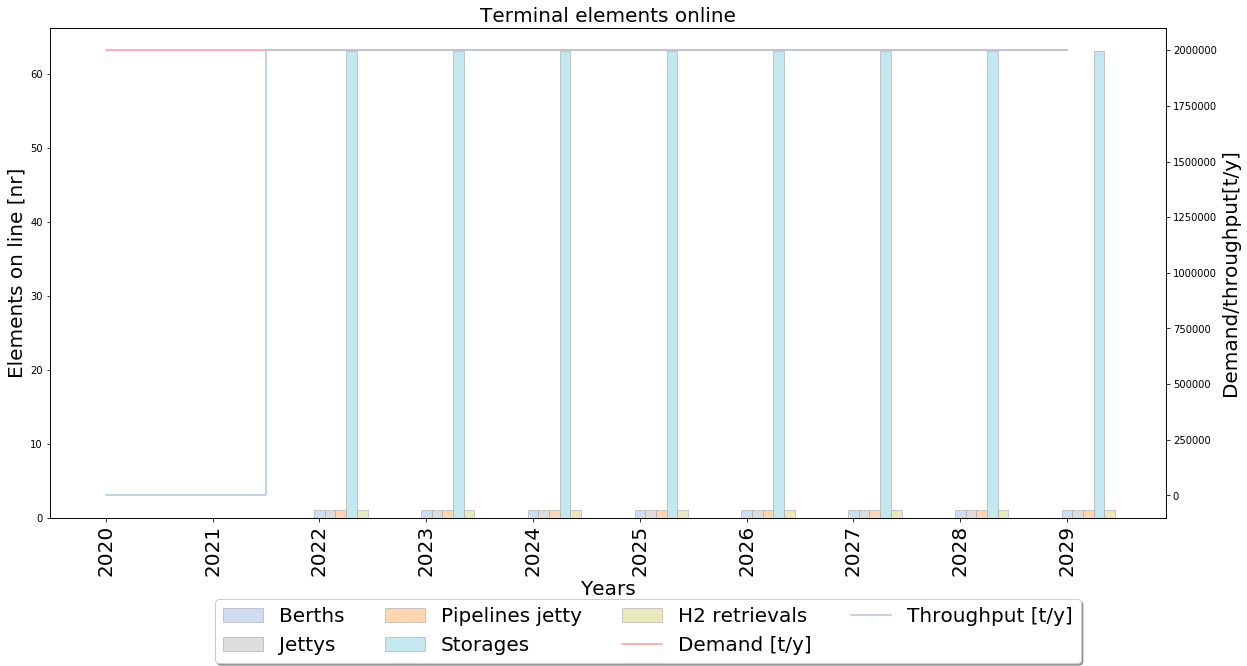

In [10]:
Terminal.terminal_elements_plot()
# Terminal.terminal_occupancy_plot()
# #Terminal.plant_occupancy_plot()
# Terminal.Jetty_capacity_plot()

   year        capex  capex_material  maintenance   insurance       energy  \
0  2020  722976000.0               0          0.0         0.0          0.0   
1  2021  489814000.0               0          0.0         0.0          0.0   
2  2022          0.0               0   13312600.0  12062600.0  143246400.0   
3  2023          0.0               0   13312600.0  12062600.0  143246400.0   
4  2024          0.0               0   13312600.0  12062600.0  143246400.0   
5  2025          0.0               0   13312600.0  12062600.0  143246400.0   
6  2026          0.0               0   13312600.0  12062600.0  143246400.0   
7  2027          0.0               0   13312600.0  12062600.0  143246400.0   
8  2028          0.0               0   13312600.0  12062600.0  143246400.0   
9  2029          0.0               0   13312600.0  12062600.0  143246400.0   

       labour  fuel  purchaseH2  purchase_material  demurrage      revenues  
0         0.0     0           0                  0          0  

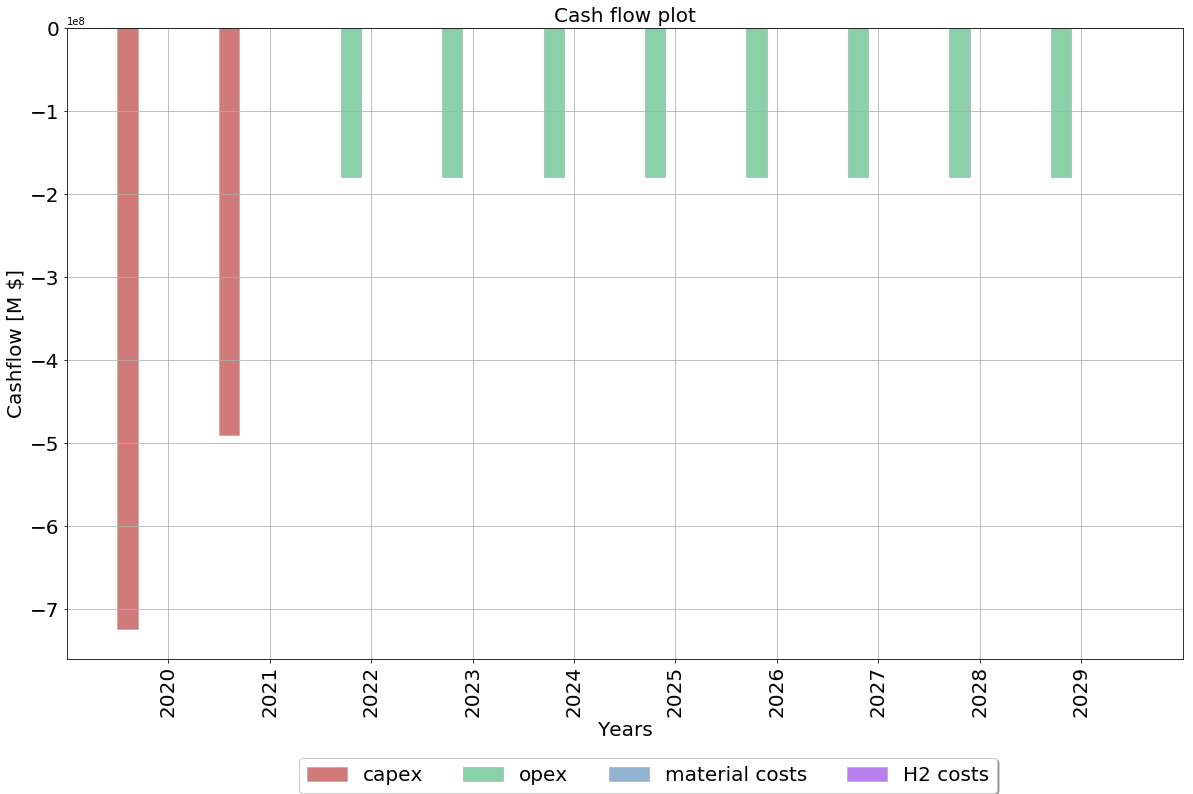

In [11]:
labour = opentisim.liquidbulk.Labour(**opentisim.liquidbulk.labour_data)
cash_flows, cash_flows_WACC_real = opentisim.core.add_cashflow_elements(Terminal, labour)
print(cash_flows)
opentisim.plot.cashflow_plot(Terminal, cash_flows)